In [ ]:
# Have you analyze the dataset?

#Is it balance? Time Test is after Train test  (sometimes it doesn't). 
#dataset, train and test, forecaeting, different dates, split into train and valid, need to split based on dates.

#for example, train 1-6 month, valid 7-9 month, because need to predict based on the past for the future.
#after test the model with the validation, if it's good, we can combine train and validation as one dataset
#And build the model again with this larger dataset, it can perform better!!!

#Are they similar? (Analyzing the count by day)
#First we must compare both datasets,  trying to find insights
#Try to make a little analysis of it, I will try to prepare something this days too. And we can discuss it.
#Do you have some preference for communicate btw us?

In [ ]:
#1.

In [1]:
#data like:
#daily historical sales data
#six data file

#items.csv
#item_categories.csv
#shops.csv

#sales_train.csv
#test.csv

#sample_submission.csv


#goal: The task is to forecast the total amount of products sold in every shop for the test set. One period.

#Challenge1: Creating a robust model that can handle the list of shops and products slightly changes every month.




In [1]:
import os

path = os.getcwd()
print(path)

/Users/mac/Desktop/Kaggle/competitive-data-science-predict-future-sales


In [14]:
import numpy as np

In [2]:
import pandas as pd
import dask.dataframe as dd

df_train = pd.read_csv(os.path.join(path, "sales_train.csv"))
df_items = pd.read_csv(os.path.join(path, "items.csv"), usecols = ["item_id", "item_category_id"])

#df_train = dd.read_csv(os.path.join(path, "sales_train.csv"))
#df_items = dd.read_csv(os.path.join(path, "items.csv"), usecols = ["item_id", "item_category_id"])

In [3]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df_items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [5]:
df_train_category = df_train.merge(df_items, how = "left", on = "item_id")

In [6]:
df_train_category.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56


In [7]:
df_train_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 179.2+ MB


In [8]:
df_train_category.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [9]:
#is there any missing data or incorrect format??? Nope, no missing data
df_train_category.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

In [10]:
#transfer to datetime???
# df_train_category['shop_id'] = df_train_category['shop_id'].astype(str)
# df_train_category['item_id'] = df_train_category['item_id'].astype(str)
# df_train_category['item_category_id'] = df_train_category['item_category_id'].astype(str)


In [11]:
df_train_category["Month"] = df_train_category["date"].apply(lambda x: x.split(".")[1])
df_train_category["Year"] = df_train_category["date"].apply(lambda x: x.split(".")[2])

In [12]:
df_train_category.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,Month,Year
0,02.01.2013,0,59,22154,999.00,1.0,37,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,58,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,58,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,58,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,56,01,2013


In [23]:
df_train_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
 7   Month             object 
 8   Year              object 
dtypes: float64(2), int64(4), object(3)
memory usage: 224.0+ MB


In [24]:
#new_df=pd.pivot_table(df, value=['quantity_buy_item_month'], 
#index=['shop_id', 'item_id' , 'item_category_id' ], aggfunc={'a quantity_buy_item_month ': np.sum}) 
#then you merge this new_df by index_value with the train dataset

new_df = pd.pivot_table(df_train_category, values = ['item_cnt_day'], index = ['shop_id', 'item_category_id', 'item_id'],
                       aggfunc={'item_cnt_day': np.sum})


In [25]:
new_df.head()
#df_train_category_gb = df_train_category.groupby([df_train_category['date'],df_train_category['shop_id']])['item_id'].count()

item_cnt_day
shop_id item_category_id item_id              
0       0                16255             1.0
        1                5740              1.0
        2                5570              1.0
                         5572             21.0
                         5573              2.0
...                                        ...
59      80               9254              8.0
        83               22087           212.0
                         22088           198.0
                         22091            39.0
                         22092            85.0

[424124 rows x 1 columns]

In [28]:
df_train_category = df_train_category.merge(new_df, how = 'left', on = ['shop_id', 'item_category_id', 'item_id'])

In [29]:
df_train_category.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day_x,item_category_id,Month,Year,item_cnt_day_y
0,02.01.2013,0,59,22154,999.00,1.0,37,01,2013,1.0
1,03.01.2013,0,25,2552,899.00,1.0,58,01,2013,0.0
2,05.01.2013,0,25,2552,899.00,-1.0,58,01,2013,0.0
3,06.01.2013,0,25,2554,1709.05,1.0,58,01,2013,1.0
4,15.01.2013,0,25,2555,1099.00,1.0,56,01,2013,10.0


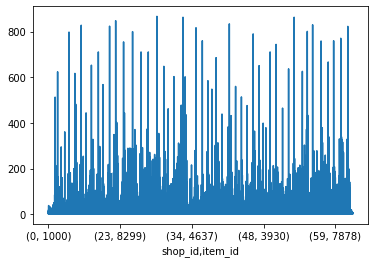

In [73]:
#df_train_category.groupby([df_train_category['shop_id'], df_train_category['item_id']])['item_id'].count().plot()